# Tout ce qu'il faut  savoir sur la matrice de confusion, courbe ROC et AUC pour l'apprentissage machine



## A - Matrice de confusion - Pas si confuse !

Vous êtes-vous déjà retrouvé dans une situation où vous vous attendiez à ce que votre modèle d'apprentissage machine soit très performant, mais où il s'est avéré peu précis ? Vous avez fait tout le travail nécessaire - alors où le modèle de classification s'est-il trompé ? Comment pouvez-vous corriger cela ?

Il existe de nombreuses façons (les fameuses métriques) d'évaluer les performances de votre modèle de classification, mais aucune n'a résisté à l'épreuve du temps comme la matrice de confusion. Elle nous aide à évaluer les performances de notre modèle, à déterminer où il a mal fonctionné et nous offre des conseils pour corriger notre modèle ou ses hyperparamaètres. 


Dans cet article, nous allons voir comment une matrice de confusion donne une vue globale des performances d'un modèle. Et contrairement à son nom, vous réaliserez qu'une matrice de confusion est un concept assez simple mais puissant. Alors, dévoilons le mystère qui entoure la matrice de confusion !

### Voici ce que nous allons découvrir dans cette première partie :

* 1. Qu'est-ce qu'une matrice de confusion ?
    * Vrai positif
    * Vrai négatif
    * Faux positif - Erreur de type 1
    * Faux négatif - Erreur de type 2
* 2. Pourquoi une matrice de confusion ?
* 3. Précision ou rappel
* 4. La F-Mesure ou F-Score
* 5. Matrice de confusion dans Scikit-learn
* 6. Matrice de confusion pour la classification multi-classes
 

### 1. Qu'est-ce qu'une matrice de confusion ?
Oui, qu'est-ce qu'une matrice de confusion, après tout ?

Une matrice de confusion est une matrice N x N utilisée pour évaluer la performance d'un modèle de classification, où N est le nombre de classes cibles (les fameuses "targets"). La matrice compare les valeurs cibles réelles avec celles prédites par le modèle d'apprentissage machine. Cela nous donne une vue d'ensemble des performances de notre modèle de classification et des types d'erreurs qu'il commet.

Pour un problème de classification binaire, nous avons donc une matrice 2 x 2 comme indiqué ci-dessous avec 4 valeurs :

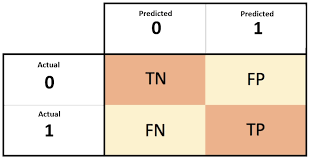

Déchiffrons cette matrice :

* La variable cible a deux valeurs : 0 ou 1 (ou vrai/faux ou Oui/Non ou Positive/Négative...)
* Les lignes (Actual) représentent les valeurs réelles de la variable cible
* Les colonnes (Predicted) représentent les valeurs prédites de la variable cible

Mais qu'est-ce que TP, FP, FN et TN ici ? C'est la partie cruciale d'une matrice de confusion. Comprenons chaque terme ci-dessous.

#### Comprendre le vrai positif, le vrai négatif, le faux positif et le faux négatif dans une matrice de confusion

> Vrai positif (TP comme True Positive) 
La valeur prévue correspond à la valeur réelle
La valeur réelle est 1 (ou positive) et le modèle prévoit une valeur de 1 (ou positive)

> Vrai négatif (TN comme True Negative)
La valeur prévue correspond à la valeur réelle
La valeur réelle est 0 (ou négative) et le modèle prévoit une valeur 0 (ou négative)

> Faux positif (FP comme False Positive) - Fausse alarme
La valeur prédite est fausse
La valeur réelle est 0 (ou negative), mais le modèle prédit une valeur 1 (ou positive)
Également connue sous le nom d'erreur de type 1

> Faux négatif (FN comme False Negative)
La valeur prédite est fausse
La valeur réelle est 1 (ou positive), mais le modèle prédit une valeur 0 (ou négative)
Également connue sous le nom d'erreur de type 2

>Il est à noter que la terminologie anglaise est trompeuse. Pédagogiquement on devrait plutôt parler de positif faux et de négatif faux, cela éclaire mieux ces indicateurs. 

Donnons un exemple. Supposons que nous ayons un ensemble de données de classification avec 1000 points de données. Nous y plaçons un classificateur et obtenons la matrice de confusion ci-dessous :

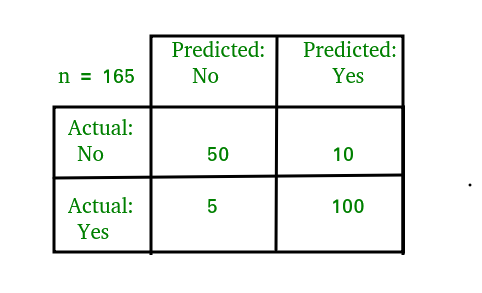

Les différentes valeurs de la matrice de confusion seraient les suivantes :

* Vrai Positif (TP) = 100 ; ce qui signifie que 100 points de données de classe positive ont été correctement classés par le modèle
* Vrai négatif (TN) = 50 ; ce qui signifie que 50 points de données de classe négative ont été correctement classés par le modèle
* Faux positif (FP) = 10 ; ce qui signifie que 10 points de données de la classe négative ont été incorrectement classés comme appartenant à la classe positive par le modèle
* Faux négatif (FN) = 5 ; ce qui signifie que 5 points de données de classe positive ont été incorrectement classés comme appartenant à la classe négative par le modèle

Cela s'est avéré être un classificateur assez correct pour notre ensemble de données compte tenu du nombre relativement plus important de valeurs positives et négatives réelles.


### 2. Pourquoi avons-nous besoin d'une matrice de confusion ?
Avant de répondre à cette question, réfléchissons à un hypothétique problème de classification.

Supposons que vous vouliez prédire combien de personnes sont infectées par un virus contagieux avant qu'elles ne présentent les symptômes, et les isoler de la population saine (ça vous dit quelque chose ? 😷). Les deux valeurs de notre variable cible seraient Malade et Non Malade.

Maintenant, vous devez vous demander pourquoi nous avons besoin d'une matrice de confusion alors que nous avons un une métrique très répandue qui est l'exactitude. Voyons où celle-ci s'arrête.

Notre ensemble de données est un exemple d'un ensemble de données déséquilibré. Il y a 960 points de données pour la classe négative et 40 points de données pour la classe positive. Voici comment nous allons calculer l'exactitude (attention accuracy en anglais c'est exactitude et non pas précision) :

$$Accuracy=\frac{TP+TN}{TP+TN+FP+FN}$$



Voyons comment notre modèle a fonctionné :
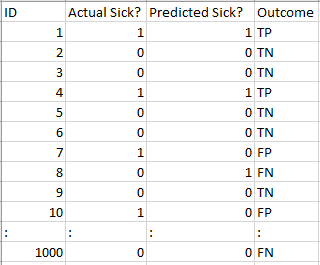

Les valeurs totales des résultats sont :

TP = 30, TN = 930, FP = 30, FN = 10

Ainsi, la précision de notre modèle s'avère être :

$$Accuracy=\frac{30+930}{30+30+930+10}=0.96$$

96% ! Pas mal non ?

Mais cela donne une mauvaise idée du résultat. 

Notre modèle dit : "Je peux prédire les personnes malades 96% du temps". Mais il fait le contraire. Il prédit les personnes qui ne tomberont pas malades avec 96% de précision alors que les malades propagent le virus !

Pensez-vous que ce soit une mesure correcte pour notre modèle étant donné la gravité du problème ? Ne devrions-nous pas mesurer le nombre de cas positifs que nous pouvons prédire correctement pour arrêter la propagation du virus contagieux ? Ou peut-être, parmi les cas correctement prédits, combien de cas positifs pour vérifier la fiabilité de notre modèle ?

C'est là que nous rencontrons le double concept de **Précision** et de **Rappel**.

### 3. Précision ou rappel
>La précision nous indique combien de cas correctement prévus se sont avérés positifs.

Voici comment calculer la Précision :
$$Precision = \frac{TP}{TP+FP}$$

Cela permet de déterminer si notre modèle est fiable ou non.

> Le rappel nous indique combien de cas positifs réels nous avons pu prévoir correctement avec notre modèle.

Et voici comment nous pouvons calculer le Rappel :

$$Rappel = \frac{TP}{TP+FN}$$

Exemple : reprenons l'exemple ci-dessus. 

Dans le code ci-dessous, j'ai recrée articiellement les données pour représenter la matrice de confusion.

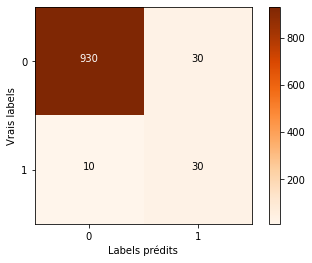

Valeurs de TN, FP, FN, TP : 
 930 30 10 30
Rapport de Classification  : 
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       960
         1.0       0.50      0.75      0.60        40

    accuracy                           0.96      1000
   macro avg       0.74      0.86      0.79      1000
weighted avg       0.97      0.96      0.96      1000



In [58]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools

# actual values
actual=np.concatenate((np.zeros(960),np.ones(40)))


# predicted values
predicted=np.concatenate((np.zeros(930),np.ones(30),np.zeros(10),np.ones(30)))

# confusion matrix
cnf_matrix = confusion_matrix(actual,predicted)
#print('Matrice de confusion : \n',cnf_matrix)

classes = range(0,2)
plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Oranges')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

# outcome values order in sklearn
tn, fp, fn ,tp = confusion_matrix(actual,predicted).reshape(-1)
print('Valeurs de TN, FP, FN, TP : \n',tn, fp, fn, tp)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted)
print('Rapport de Classification  : \n',matrix)

Nous pouvons facilement calculer la Précision et le Rappel pour notre modèle en introduisant les valeurs dans les questions ci-dessus :


$$Precision = \frac{30}{30+30}=0.5$$

$$Rappel = \frac{30}{30+10}=0.75$$

50 % des cas correctement prévus se sont révélés positifs. Alors que 75 % des cas positifs ont été prédits avec succès par notre modèle. Vous remarquez d'ailleurs que l'on retrouve ces valeurs de la Précision et du Rappel dans le "rapport de classification" dont nous parlerons un peu plus bas et que ces valeurs sont données ici pour le cas dit positif, c'est à dire 1. On voit bien que si l'on parle de 0 c'est différent. Mais ici, comme on l'a dit, on préfère  s'intéresser au cas 1.

>La précision est une mesure utile dans les cas où les faux positifs sont plus préoccupants que les faux négatifs.

La précision est importante dans les systèmes de recommandation de musique ou de vidéo, les sites de commerce électronique, etc. Des résultats erronés peuvent entraîner une perte de clientèle et nuire à l'entreprise.

>Le rappel est une mesure utile dans les cas où les faux négatifs l'emportent sur les faux positifs.

Le rappel est important dans les cas médicaux où il importe peu que nous déclenchions une fausse alerte (erreur de type 1), mais où les cas positifs réels ne doivent pas passer inaperçus !

Dans notre exemple, le rappel serait une meilleure mesure parce que nous ne voulons pas qu'une personne infectée puisse se mélanger à la population saine, propageant ainsi le virus contagieux. Vous pouvez maintenant comprendre pourquoi la précision était une mauvaise mesure pour notre modèle.

Mais il y aura des cas où il n'y aura pas de distinction claire entre la précision et le rappel. Que devrions-nous faire dans ces cas-là ? Nous les combinons !

### 4. La F-mesure ou F-Score
En pratique, lorsque nous essayons d'augmenter la précision de notre modèle, le rappel diminue, et vice-versa. La F-Mesure saisit les deux tendances en une seule valeur :

$$F{mesure}=\frac{2}{\frac{1}{Precision}+\frac{1}{Rappel}}$$


Le F-Mesure est une moyenne harmonique de la précision et du rappel, et elle donne donc une idée combinée de ces deux mesures. Elle est maximale lorsque la Précision est égale au Rappel.

Mais il y a un hic ici. L'interprétabilité de la F-Mesure est médiocre. Cela signifie que nous ne savons pas ce que notre classificateur maximise - la précision ou le rappel ? Nous l'utilisons donc en combinaison avec d'autres métriques, ce qui nous donne une image complète du résultat.

Dans notre exemple précédent on a donc : 

$$F{mesure}=\frac{2}{\frac{1}{0.5}+\frac{1}{0.75}}=0.6$$


 

### 5.  Matrice de confusion en utilisant Scikit-Learn en Python
Vous connaissez la théorie, maintenant, mettons la en pratique. Codons une matrice de confusion avec la bibliothèque Scikit-learn en Python.

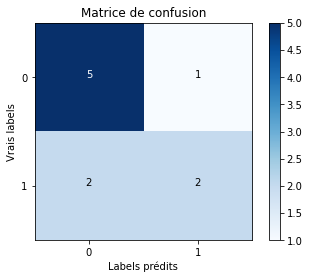

Valeurs de TN, FP, FN, TP : 
 5 1 2 2
Rapport de Classification  : 
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.67      0.50      0.57         4

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10



In [59]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools

# actual values
actual = [1,0,0,1,0,0,1,0,0,1]
# predicted values
predicted = [1,0,0,1,0,0,0,1,0,0]

# confusion matrix
cnf_matrix = confusion_matrix(actual,predicted)
#print('Matrice de confusion : \n',cnf_matrix)

classes = range(0,2)
plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

# outcome values order in sklearn
tn, fp, fn ,tp = confusion_matrix(actual,predicted).reshape(-1)
print('Valeurs de TN, FP, FN, TP : \n',tn, fp, fn, tp)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted)
print('Rapport de Classification  : \n',matrix)

Sklearn a deux grandes fonctions : confusion_matrix() et classification_report().

* La fonction confusion_matrix() de Sklearn produit les résultats dans l'ordre suivant : TN, FP, FN, TP. Faites donc attention lorsque vous interprétez le résultat
* Sklearn classification_report() fournit des informations sur la précision, le rappel et la F-Mesure pour chaque classe de cible. En plus de cela, il possède également quelques valeurs supplémentaires :  macro avg et avg pondérée

La macro avg est la moyenne de la précision/du rappel/du F1-score. Et weighted avg est la moyenne pondérée. 


### 6. Matrice de confusion pour la classification multi-classes

Comment fonctionnerait une matrice de confusion pour un problème de classification multi-classes ? 

Dessinons une matrice de confusion pour un problème de classification multiclasse où nous devons prédire si on a affaire à une image de chien, de lapin ou de chat:

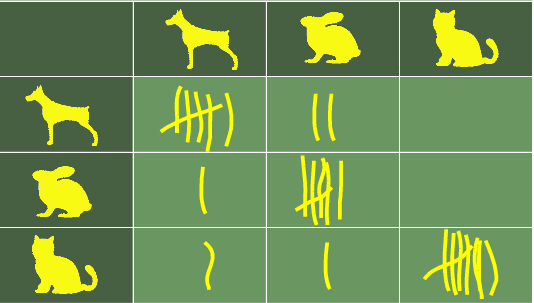


#### Exercice : Essayez de reconstituer la matrice de confusion...(c'est une matrice 3x3)



#### Et soudain...
>...La matrice de confusion n'est plus aussi confuse ! Ce notebook nous donne une base solide sur la façon d'interpréter et d'utiliser une matrice de confusion pour les algorithmes de classification dans l'apprentissage machine.

## B - Comment utiliser les courbes ROC et les courbes de précision-rappel pour la classification en python


Il peut être plus souple de prédire les probabilités d'une observation appartenant à chaque classe dans un problème de classification plutôt que de prédire directement les classes.

Cette flexibilité vient de la façon dont les probabilités peuvent être interprétées en utilisant différents seuils qui permettent à l'opérateur du modèle de faire des compromis entre les préoccupations relatives aux erreurs commises par le modèle, comme le nombre de faux positifs par rapport au nombre de faux négatifs. Cela est nécessaire lorsque l'on utilise des modèles où le coût d'une erreur est supérieur au coût d'autres types d'erreurs.

Deux outils de diagnostic qui aident à l'interprétation des prévisions probabilistes pour les problèmes de modélisation prédictive de la classification binaire (à deux classes) sont les courbes ROC et les courbes de précision de rappel.

Dans ce tutoriel, vous découvrirez les courbes ROC, les courbes de précision-rappel et quand les utiliser pour interpréter la prédiction des probabilités pour les problèmes de classification binaire.

Après avoir terminé ce tutoriel, vous saurez :

<li> Les courbes ROC résument le compromis entre le taux positif vrai et le taux positif faux pour un modèle prédictif utilisant différents seuils de probabilité.</li>
<li>Les courbes de précision-rappel résument le compromis entre le taux positif réel et la valeur prédictive positive pour un modèle prédictif utilisant différents seuils de probabilité.</li>
<li>Les courbes ROC sont appropriées lorsque les observations sont équilibrées entre chaque classe, tandis que les courbes de précision-rappel sont appropriées pour les ensembles de données déséquilibrés.</li>


Ce tutoriel est divisé en 6 parties :

7. Prévoir les probabilités
8. Que sont les courbes ROC ?
9. Courbes ROC et AUC en Python
10. Que sont les courbes de rappel de précision ?
11. Courbes de rappel de précision et AUC en python
12. Quand utiliser les courbes ROC ou les courbes de rappel de précision ?

### 7. Prévoir les probabilités
Dans un problème de classification, nous pouvons décider de prédire directement les valeurs de classe.

Il peut aussi être plus souple de prévoir les probabilités pour chaque classe. La raison en est de pouvoir choisir et même calibrer le seuil d'interprétation des probabilités prédites.

Par exemple, une valeur par défaut pourrait être d'utiliser un seuil de 0,5, ce qui signifie qu'une probabilité dans l'intervalle [0.0, 0.49] est un résultat négatif (0) et une probabilité dans l'intervalle [0.5, 1.0] est un résultat positif (1).

Ce seuil peut être ajusté afin de régler le comportement du modèle pour un problème spécifique. Un exemple serait de réduire davantage l'un ou l'autre type d'erreur.

Lorsque l'on fait une prédiction pour un problème de classification binaire ou à deux classes, il y a deux types d'erreurs que l'on peut faire.

<li> Faux positif. Prédire un événement alors qu'il n'y en a pas eu. On devrait d'ailleurs dire plutôt "positif faux" </li>
<li> Faux négatif. Ne pas prédire un événement alors qu'il y a eu un événement. De même, on devrait plutôt dire "négatif faux" </li>

En prédisant des probabilités et en calibrant un seuil, l'opérateur du modèle peut choisir un équilibre entre ces deux préoccupations.

Par exemple, dans un système de prédiction du brouillard, nous pouvons être beaucoup plus préoccupés par le fait d'avoir peu de faux négatifs que de faux positifs. Un faux négatif signifierait qu'il n'y a pas d'avertissement concernant un jour de brouillard alors qu'en fait, il s'agit d'un jour de brouillard élevé, ce qui entraîne des problèmes de santé dans la population qui peut ne pas prendre de précautions. Un faux positif signifie que le public prendrait des mesures de précaution alors qu'il n'en a pas besoin.

Une façon courante de comparer les modèles qui prédisent les probabilités de problèmes à deux classes est d'utiliser une courbe ROC.

### 8. Que sont les courbes ROC ?
Un outil utile pour prédire la probabilité d'un résultat binaire est la courbe des caractéristiques de fonctionnement du récepteur, ou courbe ROC (Receiver Operating Characteristic).

Il s'agit d'un tracé du taux de faux positifs (axe des x) par rapport au taux de vrais positifs (axe des y) pour un certain nombre de valeurs seuils candidates différentes entre 0,0 et 1,0. En d'autres termes, elle représente le taux de fausses alarmes par rapport au taux de réussite.

Le taux de vrais positifs est calculé comme le nombre de vrais positifs divisé par la somme du nombre de vrais positifs et du nombre de faux négatifs. Il décrit la capacité du modèle à prédire la classe positive lorsque le résultat réel est positif.

> Taux de vrais positifs = vrais positifs / (vrais positifs + faux négatifs)
Le véritable taux positif est également appelé sensibilité.

> Sensibilité = vrais positifs / (vrais positifs + faux négatifs)
Le taux de faux positifs est calculé comme le nombre de faux positifs divisé par la somme du nombre de faux positifs et du nombre de vrais négatifs.
Il est également appelé taux de fausses alertes car il résume la fréquence à laquelle une classe positive est prédite alors que le résultat réel est négatif.

> Taux de faux positifs = faux positifs / (faux positifs + vrais négatifs)
Le taux de faux positifs est également appelé spécificité inversée, où la spécificité est le nombre total de vrais négatifs divisé par la somme du nombre de vrais négatifs et de faux positifs.

>Spécificité = Vrais négatifs / (Vrais négatifs + Faux positifs)
Où : Taux de faux positifs = 1 - Spécificité

La courbe ROC est un outil utile pour plusieurs raisons :

<li> Les courbes de différents modèles peuvent être comparées directement en général ou pour différents seuils.</li>
<li> L'aire sous la courbe (AUC) peut être utilisée comme un résumé de la compétence du modèle.</li>

La forme de la courbe contient beaucoup d'informations, notamment ce qui pourrait nous intéresser le plus pour un problème, le taux de faux positifs attendus et le taux de faux négatifs.

Pour que cela soit clair :

<li> Des valeurs plus petites sur l'axe des abscisses du graphique indiquent des faux positifs plus faibles et des vrais négatifs plus élevés.</li>

<li> Des valeurs plus grandes sur l'axe des y indiquent des vrais positifs plus élevés et des faux négatifs plus faibles.</li>

Si cela vous semble confus, souvenez-vous que lorsque nous prédisons un résultat binaire, il s'agit d'une prédiction correcte (vrai positif) ou non (faux positif). Il existe une tension entre ces options, de même qu'entre les vrais négatifs et les faux négatifs.

Un modèle "habile" attribuera une probabilité plus élevée à une occurrence positive réelle choisie au hasard qu'à une occurrence négative en moyenne. C'est ce que nous voulons dire lorsque nous disons que le modèle est habile. En général, les modèles habiles sont représentés par des courbes qui s'inclinent en haut à gauche de la parcelle.

Un classificateur sans compétence est un classificateur qui ne peut pas discriminer entre les classes et qui prédirait une classe aléatoire ou une classe constante dans tous les cas. Un modèle sans habileté est représenté au point (0,5, 0,5). Un modèle sans compétence à chaque seuil est représenté par une ligne diagonale allant du coin inférieur gauche du graphique au coin supérieur droit et a une AUC, une aire sous la courbe ROC, (Aire Under Curve ROC) de 0,5, c'est à dire pas mieux que le hasard.

Un modèle avec une habileté parfaite est représenté au point (0,1). Un modèle avec une habileté parfaite est représenté par une ligne qui va du bas à gauche du graphique vers le haut à gauche, puis du haut vers le haut à droite.

Un opérateur peut tracer la courbe ROC pour le modèle final et choisir un seuil qui donne un équilibre souhaitable entre les faux positifs et les faux négatifs.

### 9. Courbes ROC et AUC en Python

Nous pouvons tracer une courbe ROC pour un modèle en Python en utilisant la fonction roc_curve() scikit-learn.
La fonction prend à la fois les résultats réels (0,1) de l'ensemble de tests et les probabilités prédites pour la classe 1. La fonction renvoie les taux de faux positifs pour chaque seuil, les taux de vrais positifs pour chaque seuil et les seuils.

L'AUC (Area Under Curve ROC)  pour le ROC peut être calculée à l'aide de la fonction roc_auc_score().

Comme la fonction roc_curve(), la fonction AUC prend à la fois les résultats réels (0,1) de l'ensemble de tests et les probabilités prédites pour la classe 1. Elle renvoie un score AUC compris entre 0,0 et 1,0 pour les catégories "aucune compétence" et "compétence parfaite" respectivement.

Un exemple complet de calcul de la courbe ROC et de la courbe ROC correspondant au hasard, pour un modèle de régression logistique sur un petit problème de test, est présenté ci-dessous.


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


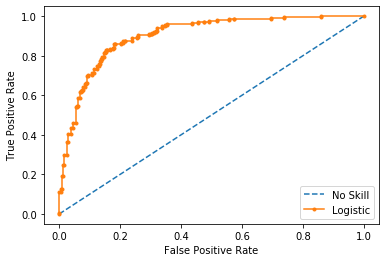

In [21]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### Il existe aussi d'autres façons d'illustrer ces métriques 
* le rapport de classification (cf partie A)
* la matrice de confusion

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



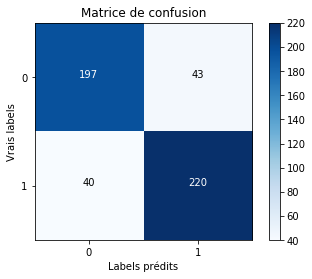

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt 
import numpy as np
import itertools

predy = model.predict(testX)

print(classification_report(testy, predy))

cnf_matrix= confusion_matrix(testy,predy)

classes = range(0,2)

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

### 10. Que sont les courbes de rappel de précision ?

Il existe de nombreuses façons d'évaluer la compétence d'un modèle de prédiction.

Une approche dans le domaine connexe de la recherche d'informations (trouver des documents sur la base de requêtes) mesure la précision et le rappel.

Ces mesures sont également utiles dans l'apprentissage machine appliqué pour évaluer les modèles de classification binaire.

La précision est un rapport entre le nombre de vrais positifs et la somme des vrais positifs et des faux positifs. Elle décrit la capacité d'un modèle à prédire la classe positive. La précision est appelée valeur prédictive positive.

Pouvoir prédictif positif = Précision ou on rappelle que 
$$Precision = \frac{TP}{TP + FP}$$

Le rappel est calculé comme le rapport du nombre de vrais positifs divisé par la somme des vrais positifs et des faux négatifs. Le rappel est identique à la sensibilité.

$$Rappel = \frac{TP}{ TP + FN}$$

>ou Rappel = Sensibilité

L'examen de la précision et du rappel est utile dans les cas où il y a un déséquilibre dans les observations entre les deux classes. Plus précisément, il existe de nombreux exemples d'absence d'événement (classe 0) et seulement quelques exemples d'événement (classe 1).

La raison en est que le grand nombre d'exemples de classe 0 signifie que nous sommes moins intéressés par la capacité du modèle à prédire correctement la classe 0, par exemple en cas de valeurs négatives réelles élevées.

La clé du calcul de la précision et du rappel est que les calculs n'utilisent pas les vrais négatifs. Il s'agit uniquement de la prédiction correcte de la classe minoritaire, la classe 1.

Une courbe de précision et de rappel est un tracé de la précision (axe des y) et du rappel (axe des x) pour différents seuils, tout comme la courbe ROC.

Un classificateur sans compétence est un classificateur qui ne peut pas faire de discrimination entre les classes et qui prédirait une classe aléatoire ou une classe constante dans tous les cas. La ligne de non-qualification change en fonction de la distribution des classes positives et négatives. C'est une ligne horizontale avec la valeur du ratio des cas positifs dans l'ensemble de données. Pour un ensemble de données équilibré, cette valeur est de 0,5.

>Alors que la ligne de base est fixée avec la ROC, la ligne de base de [courbe de précision des appels] est déterminée par le rapport entre les cas positifs (P) et négatifs (N) comme y = P / (P + N). Par exemple, nous avons y = 0,5 pour une distribution équilibrée des classes ... - Le tracé de précision du rappel est plus informatif que le tracé ROC lors de l'évaluation des classificateurs binaires sur des ensembles de données déséquilibrés, 2015.

Un modèle avec une compétence parfaite est représenté par un point à (1,1). Un modèle habile est représenté par une courbe qui s'incline vers (1,1) au-dessus de la ligne plate d'aucune habileté.

Il existe également des scores composites qui tentent de résumer la précision et le rappel ; en voici deux exemples :

<li> On connait déjà la F-Mesure ou F-score : qui calcule la moyenne harmonique de la précision et du rappel (moyenne harmonique parce que la précision et le rappel sont des taux).</li>
<li> Il existe donc aussi l'aire sous la courbe : AUC, résume l'intégrale ou une approximation de l'aire sous la courbe de précision et de rappel.</li>

En termes de sélection de modèle, la F-mesure résume la compétence du modèle pour un seuil de probabilité spécifique (par exemple 0,5), tandis que l'aire sous la courbe résume la compétence d'un modèle à travers les seuils, comme la AUC.

Cela fait du rappel de précision et du tracé de la précision par rapport au rappel et des mesures de résumé des outils utiles pour les problèmes de classification binaire qui ont un déséquilibre dans les observations pour chaque classe.

### 11. Courbes de rappel de précision en python
La précision et le rappel peuvent être calculées dans Scikit-learn.

La précision et le rappel peuvent être calculés pour les seuils à l'aide de la fonction precision_recall_curve() qui prend les valeurs de sortie réelles et les probabilités pour la classe positive comme sortie et renvoie les valeurs de précision, de rappel et de seuil.

La F-mesure peut être calculée en appelant la fonction f1_score() qui prend en argument les valeurs de classe réelles et les valeurs de classe prédites.

L'aire sous la courbe précision-rappel peut être approchée en appelant la fonction auc() et en lui passant les valeurs de rappel (x) et de précision (y) calculées pour chaque seuil.

Lorsque l'on trace la précision et le rappel pour chaque seuil sous forme de courbe, il est important que le rappel soit fourni sous forme d'axe des x et la précision sous forme d'axe des y.

L'exemple complet de calcul des courbes de précision et de rappel pour un modèle de régression logistique est présenté ci-dessous.

Logistic: f1=0.841 auc=0.898


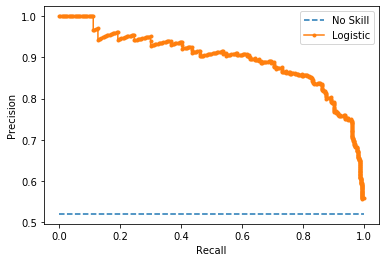

In [3]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

ci-dessus, le tracé de la courbe précision-rappel est créé, montrant la précision/le rappel pour chaque seuil pour un modèle de régression logistique (orange) par rapport à un modèle sans compétence (bleu).

### 12. Quand utiliser les courbes ROC ou les courbes de rappel de précision ?

En règle générale, l'utilisation des courbes ROC et des courbes de précision-rappel est la suivante :

<li> Les courbes ROC doivent être utilisées lorsqu'il y a un nombre à peu près égal d'observations pour chaque classe.</li>
<li>Les courbes de précision-rappel doivent être utilisées lorsqu'il y a un déséquilibre modéré à important entre les classes.</li>

La raison de cette recommandation est que les courbes ROC présentent une image optimiste du modèle sur des ensembles de données avec un déséquilibre de classe.

>Cependant, les courbes ROC peuvent présenter une vision trop optimiste des performances d'un algorithme s'il y a un déséquilibre important dans la distribution des classes. [...] Les courbes de précision-rappel (PR), souvent utilisées dans la recherche d'informations, ont été citées comme une alternative aux courbes ROC pour les tâches présentant une grande asymétrie dans la distribution des classes. - La relation entre les courbes de précision de rappel et les courbes ROC, 2006.

Certains vont plus loin et suggèrent que l'utilisation d'une courbe ROC avec un ensemble de données déséquilibrées pourrait être trompeuse et conduire à des interprétations incorrectes de la compétence du modèle.

> [...] l'interprétabilité visuelle des courbes ROC dans le contexte d'ensembles de données déséquilibrés peut être trompeuse en ce qui concerne les conclusions sur la fiabilité des performances de la classification, en raison d'une interprétation intuitive mais erronée de la spécificité. En revanche, les graphiques [courbe de précision-rappel] peuvent fournir à l'observateur une prédiction précise des performances futures de la classification, car ils évaluent la fraction de vrais positifs parmi les prédictions positives - Le tracé de la courbe de précision-rappel est plus informatif que le tracé ROC lors de l'évaluation des classificateurs binaires sur des ensembles de données déséquilibrés, 2015.

La principale raison de cet optimisme est l'utilisation de vrais négatifs dans le taux de faux positifs de la courbe ROC et le fait d'éviter soigneusement ce taux dans la courbe de précision-rappel.

>Si la proportion de cas positifs par rapport aux cas négatifs change dans une série de tests, les courbes ROC ne changeront pas. Les mesures telles que l'exactitude, la précision, la levée et les F-Mesure utilisent les valeurs des deux colonnes de la matrice de confusion. Au fur et à mesure que la distribution d'une classe change, ces mesures changeront également, même si la performance du classificateur fondamental ne change pas. Les graphiques ROC sont basés sur le taux de TP et le taux de FP, dans lesquels chaque dimension est un rapport en colonne strict, donc ne dépendent pas des distributions de classe. - Graphiques ROC : Notes et considérations pratiques pour les chercheurs en extraction de données, 2003.

Nous pouvons rendre cela concret à l'aide d'un bref exemple.

Vous trouverez ci-dessous le même exemple de courbe ROC avec un problème modifié où il y a un rapport d'environ 100:1 entre les observations de classe=0 et de classe=1 (plus précisément Classe0=985, Classe1=15).

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.716


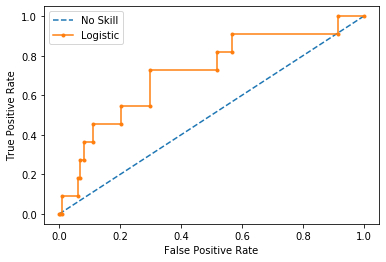

In [4]:
# roc curve and auc on an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       489
           1       0.00      0.00      0.00        11

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.49       500
weighted avg       0.96      0.98      0.97       500



/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


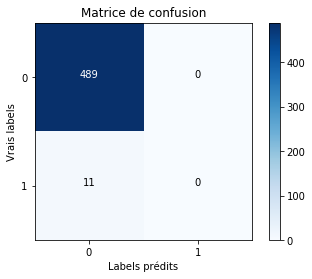

In [19]:
predy = model.predict(testX)

print(classification_report(testy, predy))

cnf_matrix= confusion_matrix(testy,predy)

classes = range(0,2)

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

En effet, il a des compétences, mais toutes ces compétences sont mesurées comme étant des prédictions négatives réelles et correctes et il y a beaucoup de prédictions négatives à faire.

Si vous passez en revue les prédictions, vous verrez que le modèle prédit la classe majoritaire (classe 0) dans tous les cas sur l'ensemble des tests. Le score est très trompeur.

Un tracé de la courbe ROC confirme l'interprétation de la AUC d'un modèle habile pour la plupart des seuils de probabilité.

Nous pouvons également répéter le test du même modèle sur le même ensemble de données et calculer à la place une courbe de rappel de précision et des statistiques.

L'exemple complet est présenté ci-dessous.

Logistic: f1=0.000 auc=0.054


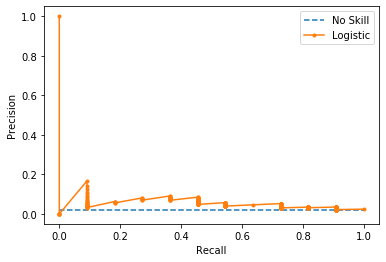

In [5]:
# precision-recall curve and f1 for an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

En suivant cet exemple ci-dessus, on obtient d'abord les scores du F1-Score et de l'AUC.

Nous pouvons voir que le modèle est pénalisé pour avoir prédit la classe majoritaire dans tous les cas. Les scores montrent que le modèle qui semblait bon selon la courbe ROC est en fait à peine habile lorsqu'on le considère en utilisant la précision et le rappel qui se concentrent sur la classe positive.

### Logistique : F-Mesure=0.000 AUC=0.054

Le tracé de la courbe précision-rappel souligne que le modèle est à peine au-dessus de la ligne d'absence de compétence pour la plupart des seuils.

Cela est possible parce que le modèle prédit des probabilités et est incertain dans certains cas. Ceux-ci sont exposés à travers les différents seuils évalués dans la construction de la courbe, faisant basculer certaines classes 0 à 1, offrant une certaine précision mais un rappel très faible.

## Lectures supplémentaires


### API
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
* http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
* http://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics

### Articles
* https://fr.wikipedia.org/wiki/Courbe_ROC
* https://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel
* https://fr.wikipedia.org/wiki/Sensibilit%C3%A9_et_sp%C3%A9cificit%C3%A9
* https://classeval.wordpress.com/simulation-analysis/roc-and-precision-recall-with-imbalanced-datasets/
* https://fr.wikipedia.org/wiki/Matrice_de_confusion
* A critical investigation of recall and precision as measures of retrieval system performance, 1989.https://dl.acm.org/citation.cfm?id=65945
* The Relationship Between Precision-Recall and ROC Curves, 2006.https://dl.acm.org/citation.cfm?id=1143874
* The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets, 2015.https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4349800/
* ROC Graphs: Notes and Practical Considerations for Data Mining Researchers, 2003.http://www.blogspot.udec.ugto.saedsayad.com/docs/ROC101.pdf



